# Graph Search 1

- Depth First Search (Stack)
- Breadth First Search (Queue)

In [1]:
from graphviz import Graph, Digraph

### Depth First Search (DFS) 
- Last lecture: BST search with complexity **O(logN)**
- Finds a path from one node to another -- works on any directed graph

In [2]:
def example(num):
    g = Graph()
    if num == 1:
        g.node("A")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "B")
    elif num == 2:
        g.edge("A", "B")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "E")
        g.edge("A", "E")
    elif num == 3:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
    elif num == 4:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
        g.edge("E", "Z")
        g.edge("C", "Z")
        g.edge("B", "A")
    elif num == 5:
        width = 8
        height = 4
        for L1 in range(height-1):
            L2 = L1 + 1
            for i in range(width-(height-L1-1)):
                for j in range(width-(height-L2-1)):
                    node1 = str(L1)+"-"+str(i)
                    node2 = str(L2)+"-"+str(j)
                    g.edge(node1, node2)
    else:
        raise Exception("no such example")
    return g

### For a regular graph, you need a new class `Graph` to keep track of the whole graph.
- Why? Remember graphs need not have a "root" node, which means there is no one origin point

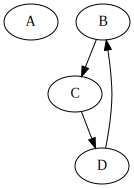

In [3]:
class Graph:
    def __init__(self):
        # name => Node
        self.nodes = {}
        # to keep track which nodes have already been visited
        self.visited = set()

    def node(self, name):
        node = Node(name)
        self.nodes[name] = node
        node.graph = self
    
    def edge(self, src, dst):
        """
        Automatically adds missing nodes.
        """
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])

    def _repr_svg_(self):
        """
        Draws the graph nodes and edges iteratively.
        """
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_image_svg_xml()
    
    def dfs_search(self, source, destination):
        """
        Clears the visited set and invokes dfs_search
        from source to destination.
        """
        self.visited.clear()
        return self.nodes[source].dfs_search(self.nodes[destination])
    
    def bfs_search(self, source, destination):
        """
        Invokes bfs_search from source to destination.
        """
        return self.nodes[source].bfs_search(self.nodes[destination])

class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.graph = None # back reference
        self.finder = None # who found me during BFS
        
    def __repr__(self):
        return self.name
    
    def dfs_search_v1(self, dst):
        """
        Returns True / False when path to dst is found / not found
        """
        # TODO: what is the simplest case? current node is the dst
        if self in self.graph.visited:
            return False
        self.graph.visited.add(self)

        if self == dst:
            return True
        
        for child in self.children:
            if child.dfs_search_v1(dst):
                return True
            
        return False

    def dfs_search(self, dst):
        """
        Returns the actual path to the dst as a tuple or None otherwise
        """
        # TODO: what is the simplest case? current node is the dst
        if self in self.graph.visited:
            return None
        self.graph.visited.add(self)

        if self == dst:
            return (self,)
        
        for child in self.children:
            child_path = child.dfs_search(dst)
            if child_path != None:
                return (self,) + child_path
            
        return None
    
    def bfs_search_v1(self, dst):
        """
        Returns True / False when path to dst is found / not found.
        Non recursive method.
        """
        to_visit = [self]
        added = {self}
        
        while len(to_visit) > 0:
            curr_node = to_visit.pop(0)
            print("CURR:", curr_node)
            if curr_node == dst:
                return True
            
            for child in curr_node.children:
                if child not in added:
                    to_visit.append(child)
                    added.add(child)
                    child.finder = curr_node
                    
            print("TO VISIT:", to_visit)
                
        return False
    
    def bfs_search(self, dst):
        """
        Returns the shortest path to dst.
        Non recursive method.
        """
        to_visit = [self]
        added = {self}
        
        while len(to_visit) > 0:
            curr_node = to_visit.pop(0)
            print("CURR:", curr_node)
            if curr_node == dst:
                return self.backtrace(dst)
            
            for child in curr_node.children:
                if child not in added:
                    to_visit.append(child)
                    added.add(child)
                    child.finder = curr_node
                    
            print("TO VISIT:", to_visit)
                
        return None
    
    def backtrace(self, dst):
        """
        Find the path backwards from dst
        """
        curr = dst
        path = (dst, )
        
        while (curr.finder != None):
            path = (curr.finder,) + path
            curr = curr.finder
            
        return path

g = example(1)
g

### Testcases for DFS

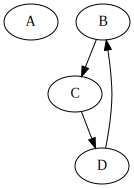

In [4]:
g

In [5]:
print(g.dfs_search("B", "A")) # should return None
print(g.dfs_search("B", "D")) # should return (B, C, D)

None
(B, C, D)


### `tuple` review

- similar to lists, but immutable
- `*` operator represents replication and not multiplication for lists and tuples
- `+` operator represents concatenation and not additional for lists and tuples

In [6]:
(3+2,) # this is a tuple containing 5

(5,)

In [7]:
(3+2) * 3 # gives us 15

15

In [8]:
(3+2,) * 3 # replicates item 5 three times and returns a new tuple

(5, 5, 5)

In [9]:
(3, ) + (5, ) # returns a new tuple containing all items in the first tuple and the second tuple

(3, 5)

### DFS search

- return the actual path rather than just returning True / False
- for example, path between B and D should be (B, C, D)

### Why is it called "*Depth* First Search"?

- we start at the starting node and go as deep as possible because recursion always goes as deep as possible before coming back to the other children in the previous level
- recursion naturally uses `Stack`, which is why we don't have to explicitly use a `Stack` data structure
- might not give us the shortest possible path

(A, B, C, D, E)
None


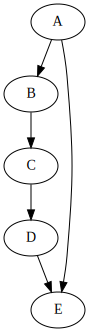

In [10]:
g = example(2)
print(g.dfs_search("A", "E")) # should return (A, B, C, D, E)
print(g.dfs_search("E", "A")) # should return None
g

### Breadth first search

- find the shortest path by exploring all children first before the grandchildren or any of the successors
- we need a `Queue` data structure
- unlike DFS, BFS gives us the shortest possible path

In [11]:
# TODO: let's define bfs_search method

CURR: A
TO VISIT: [B, C]
CURR: B
TO VISIT: [C, D, E]
CURR: C
TO VISIT: [D, E, F, G]
CURR: D
(A, B, D)


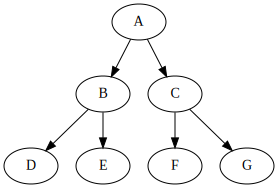

In [12]:
g = example(3)
print(g.bfs_search("A", "D"))
g

CURR: A
TO VISIT: [B, E]
CURR: B
TO VISIT: [E, C]
CURR: E
(A, E)


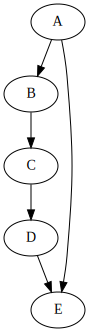

In [13]:
g = example(2)
print(g.bfs_search("A", "E"))
g

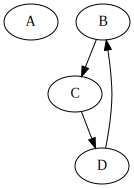

In [14]:
g = example(1)
g

In [15]:
print(g.bfs_search("B", "D")) # should return (B, C, D)

CURR: B
TO VISIT: [C]
CURR: C
TO VISIT: [D]
CURR: D
(B, C, D)


In [16]:
print(g.bfs_search("B", "A")) # should return None
# what's wrong?

CURR: B
TO VISIT: [C]
CURR: C
TO VISIT: [D]
CURR: D
TO VISIT: []
None


### How do we find the path using BFS?

CURR: A
TO VISIT: [B, C]
CURR: B
TO VISIT: [C, D, E]
CURR: C
TO VISIT: [D, E, F, G]
CURR: D
TO VISIT: [E, F, G]
CURR: E
(A, B, E)


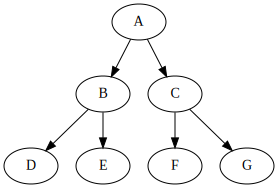

In [17]:
g = example(3)
print(g.bfs_search("A", "E"))
g

In [18]:
g.nodes["E"].finder

B

In [19]:
g.nodes["B"].finder

A

In [20]:
g.nodes["A"].finder

In [ ]:
# TODO: let's go back and implement a backtrace method to help us trace back this path